In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install imbalanced-learn

In [ ]:
df=pd.read_csv('/content/sample_data/diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [ ]:
missing_values = df.isna().sum()
print(missing_values)

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


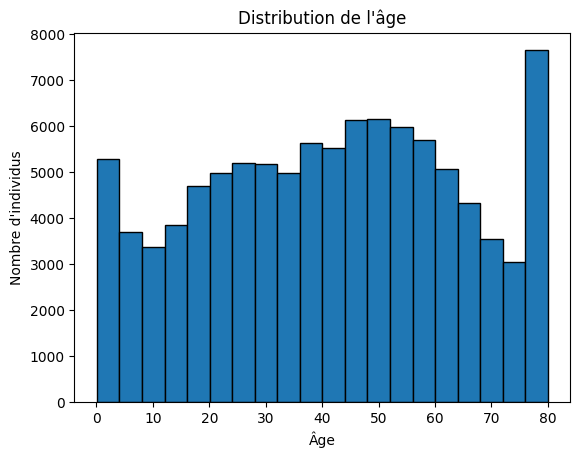

In [ ]:
plt.hist(df['age'], bins=20, edgecolor='k')
plt.xlabel('Âge')
plt.ylabel('Nombre d\'individus')
plt.title('Distribution de l\'âge')
plt.show()

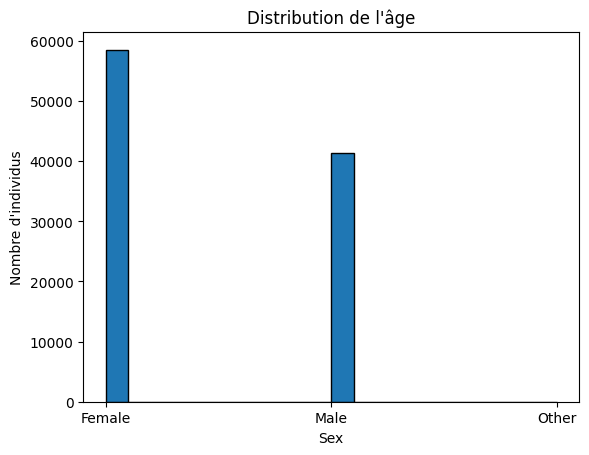

In [ ]:
plt.hist(df['gender'], bins=20, edgecolor='k')
plt.xlabel('Sex')
plt.ylabel('Nombre d\'individus')
plt.title('Distribution de l\'âge')
plt.show()
#d'apres cette visualisation on peut detecter 3 types de gendre qui n'est pas logique

In [ ]:
#On calcule le nombre de lignes contenant gender = other
df_other=df[df['gender'] == 'Other']
print(df['gender'].unique())
print(len(df_other))

['Female' 'Male' 'Other']
18


In [ ]:
#Supression des ligne contenant other
df = df[df['gender'] != 'Other']
df.reset_index(drop=True, inplace=True)
print(df['gender'].unique())
print(df.index)

['Female' 'Male']
RangeIndex(start=0, stop=99982, step=1)


In [ ]:
#verification s'il ya des valeurs manquante lors de supression des lignes de gender=other
missing_values = df.isna().sum()
print(missing_values)

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder_gender = LabelEncoder()
integer_encoder = encoder_gender.fit_transform(df['gender'])
integer_encoder

array([0, 0, 1, ..., 1, 0, 0])

In [ ]:
encoder_gender = pd.DataFrame({'gender_encoder': integer_encoder})
encoder_gender
#female=0,male=1

,gender_encoder
0,0
1,0
2,1
3,0
4,1
...,...
99977,0
99978,0
99979,1
99980,0


In [ ]:
#Visualisation de la colonne smoking_history
unique_smoking_history = df['smoking_history'].unique()
unique_smoking_history

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [ ]:
# Group the data by 'smoking_history' and calculate the number of diabetes cases in each category
df_diab = df[df['diabetes']==1]
diabetes_by_smoking = df_diab.groupby('smoking_history')['diabetes'].sum().reset_index()
diabetes_by_smoking

,smoking_history,diabetes
0,No Info,1454
1,current,948
2,ever,472
3,former,1590
4,never,3346
5,not current,690


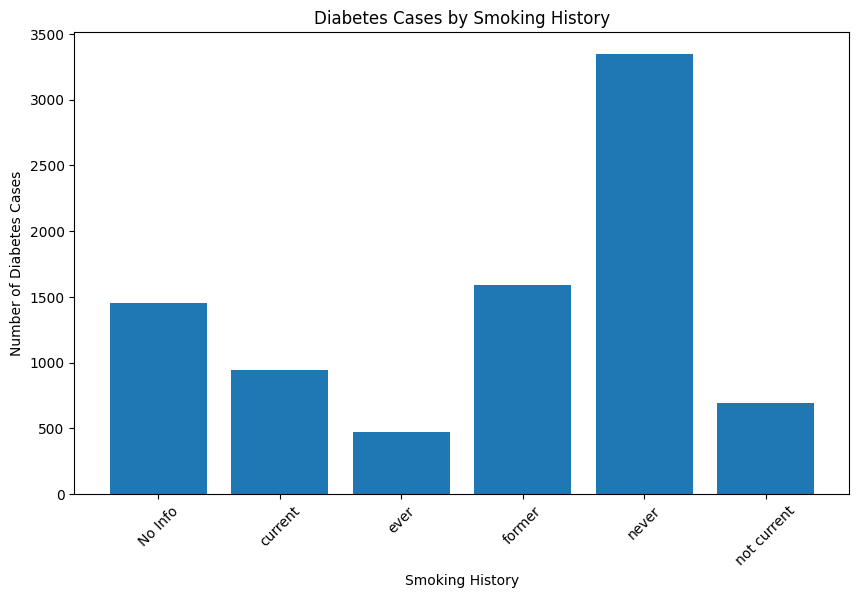

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(diabetes_by_smoking['smoking_history'], diabetes_by_smoking['diabetes'])
plt.xlabel('Smoking History')
plt.ylabel('Number of Diabetes Cases')
plt.title('Diabetes Cases by Smoking History')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()
#d'apres ce graphe il parait que smoking_history n'a pas reelement de raltion avec le diabete donc on peut supprimer

In [ ]:
df = df.drop('smoking_history', axis=1)
df

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,25.19,6.6,140,0
1,Female,54.0,0,0,27.32,6.6,80,0
2,Male,28.0,0,0,27.32,5.7,158,0
3,Female,36.0,0,0,23.45,5.0,155,0
4,Male,76.0,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...
99977,Female,80.0,0,0,27.32,6.2,90,0
99978,Female,2.0,0,0,17.37,6.5,100,0
99979,Male,66.0,0,0,27.83,5.7,155,0
99980,Female,24.0,0,0,35.42,4.0,100,0


In [ ]:
df['gender_encoder']=encoder_gender
df = df.drop('gender', axis=1)
df

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_encoder
0,80.0,0,1,25.19,6.6,140,0,0
1,54.0,0,0,27.32,6.6,80,0,0
2,28.0,0,0,27.32,5.7,158,0,1
3,36.0,0,0,23.45,5.0,155,0,0
4,76.0,1,1,20.14,4.8,155,0,1
...,...,...,...,...,...,...,...,...
99977,80.0,0,0,27.32,6.2,90,0,0
99978,2.0,0,0,17.37,6.5,100,0,0
99979,66.0,0,0,27.83,5.7,155,0,1
99980,24.0,0,0,35.42,4.0,100,0,0


In [ ]:
desired_column_order = ['gender_encoder', 'age', 'hypertension', 'heart_disease', 'bmi',
                        'HbA1c_level', 'blood_glucose_level', 'diabetes']

# Reorder the columns in the DataFrame
df = df[desired_column_order]
df

,gender_encoder,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,25.19,6.6,140,0
1,0,54.0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,23.45,5.0,155,0
4,1,76.0,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...
99977,0,80.0,0,0,27.32,6.2,90,0
99978,0,2.0,0,0,17.37,6.5,100,0
99979,1,66.0,0,0,27.83,5.7,155,0
99980,0,24.0,0,0,35.42,4.0,100,0


In [ ]:
types_de_colonnes = df.dtypes
# Afficher les types de données
print(types_de_colonnes)

gender_encoder           int64
age                    float64
hypertension             int64
heart_disease            int64
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object


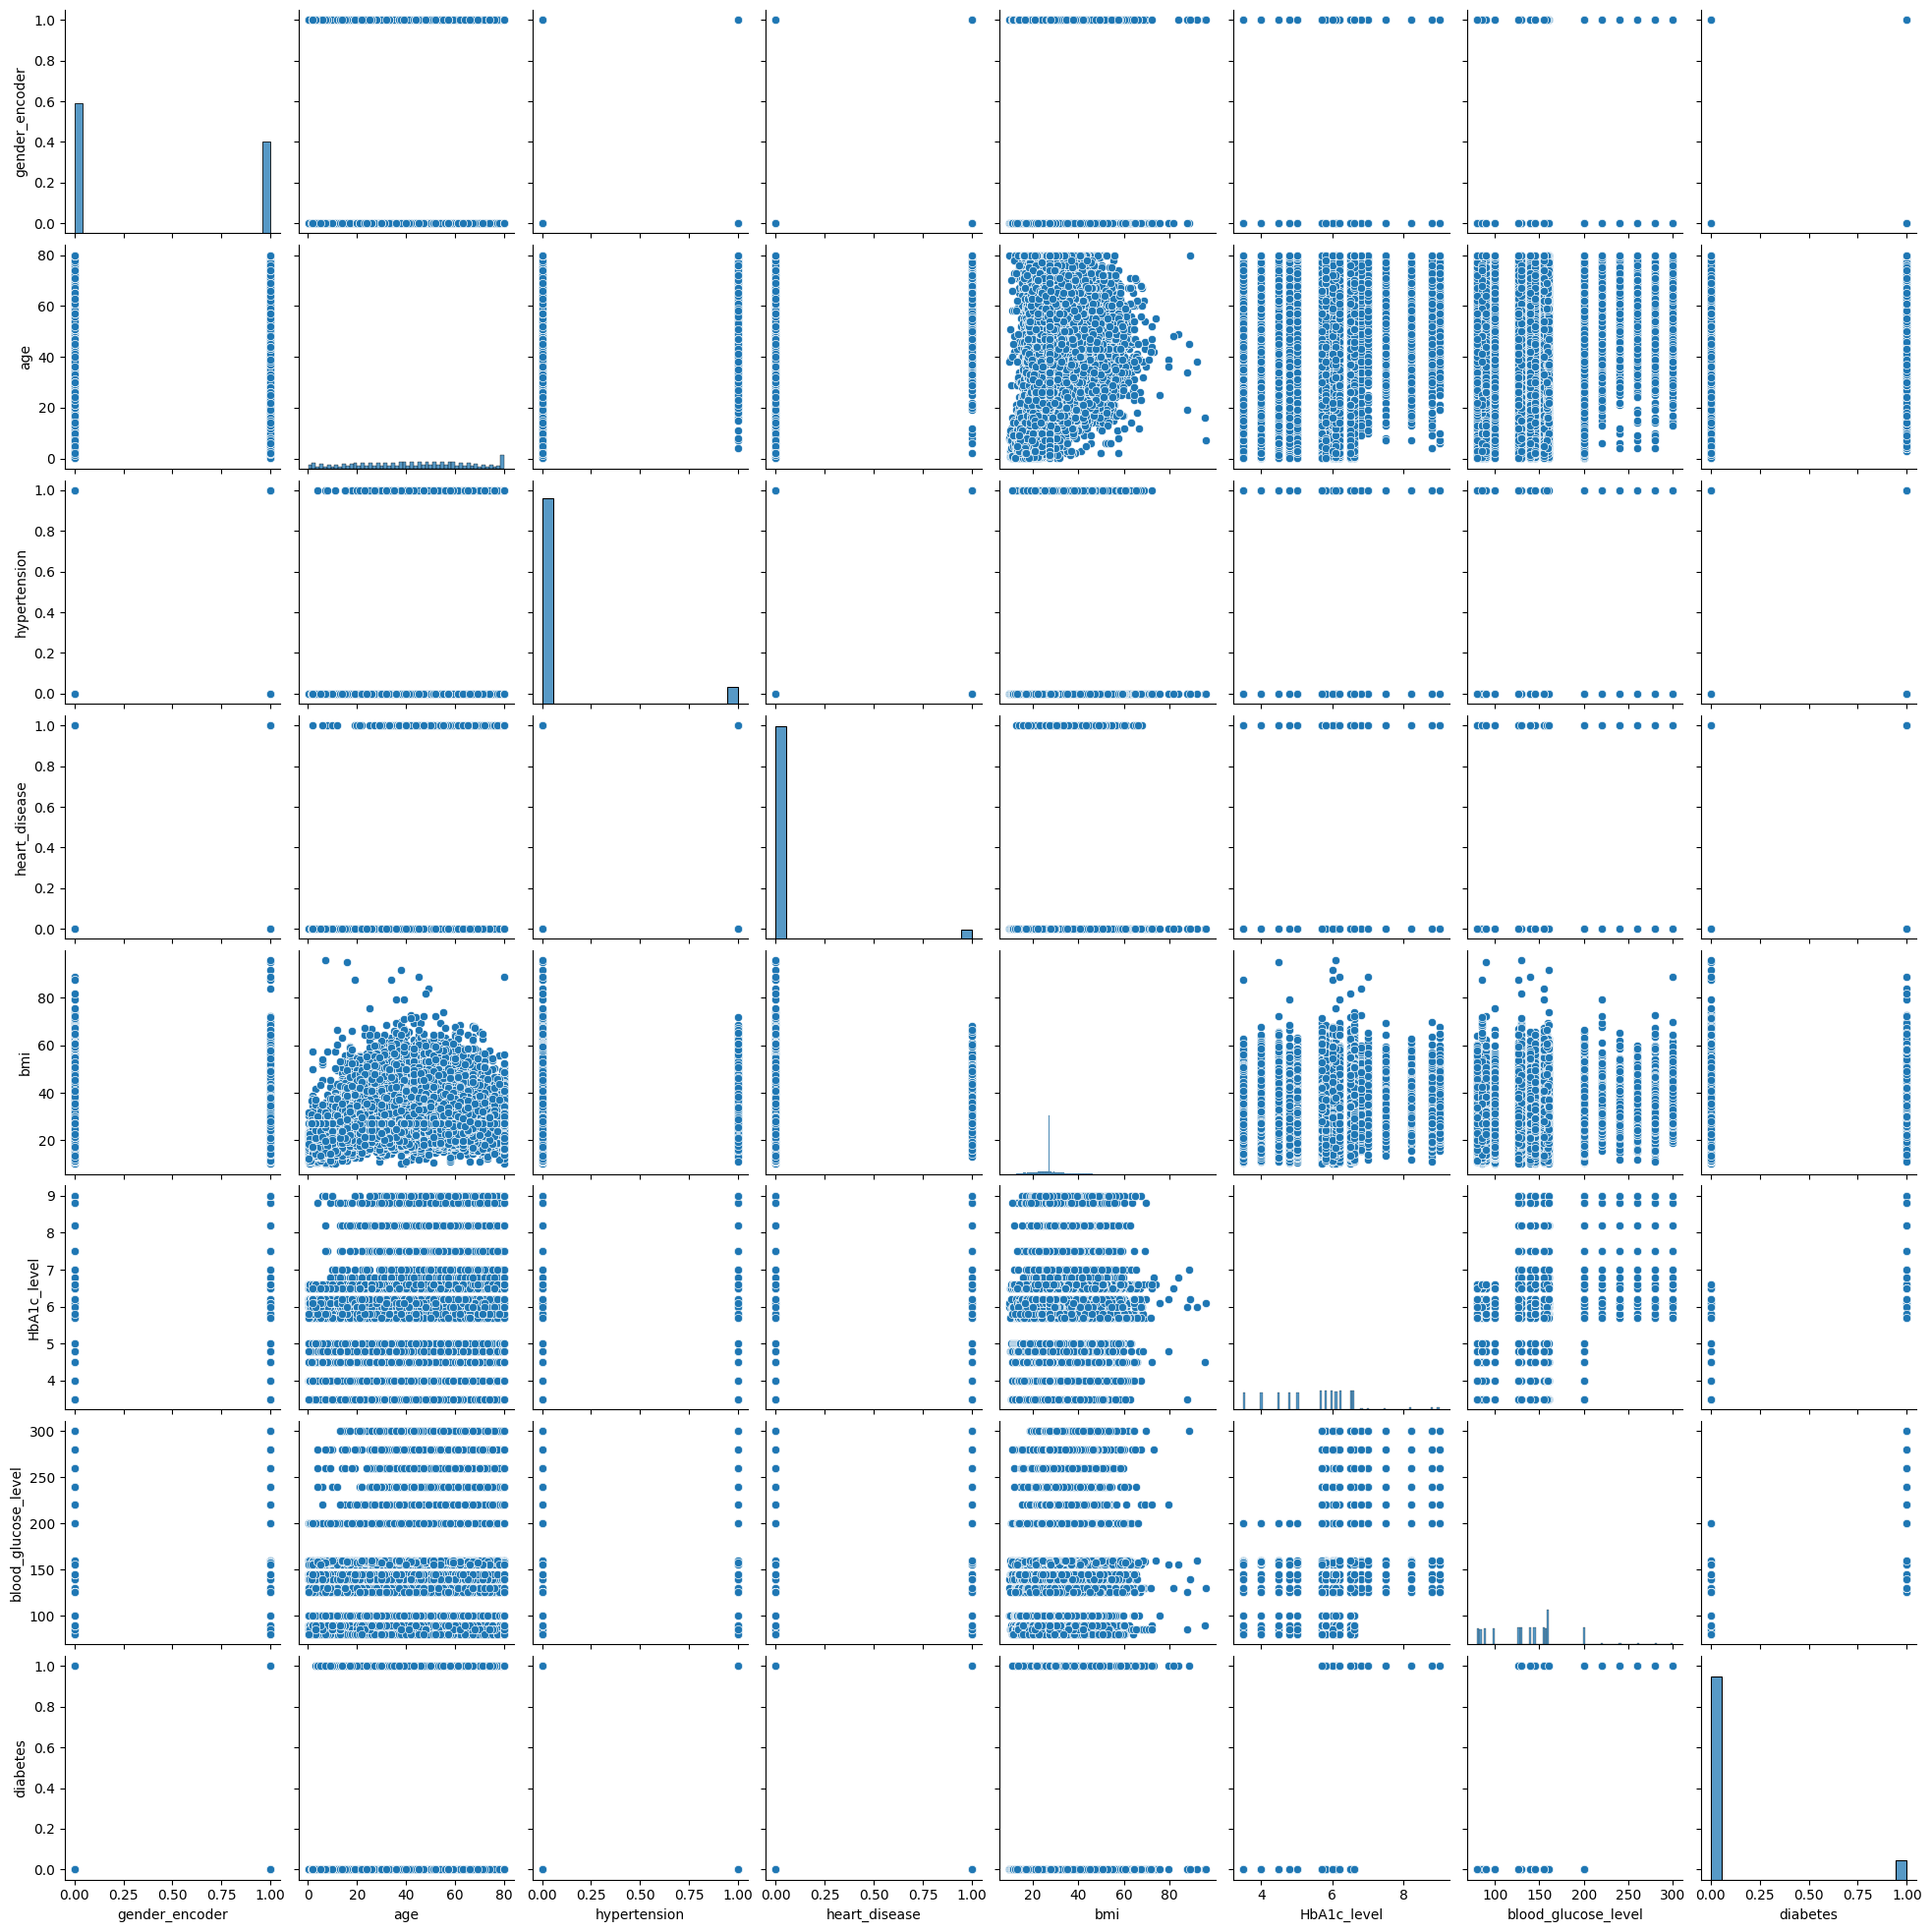

In [ ]:
import seaborn as sns
sns.pairplot(df)
plt.show()

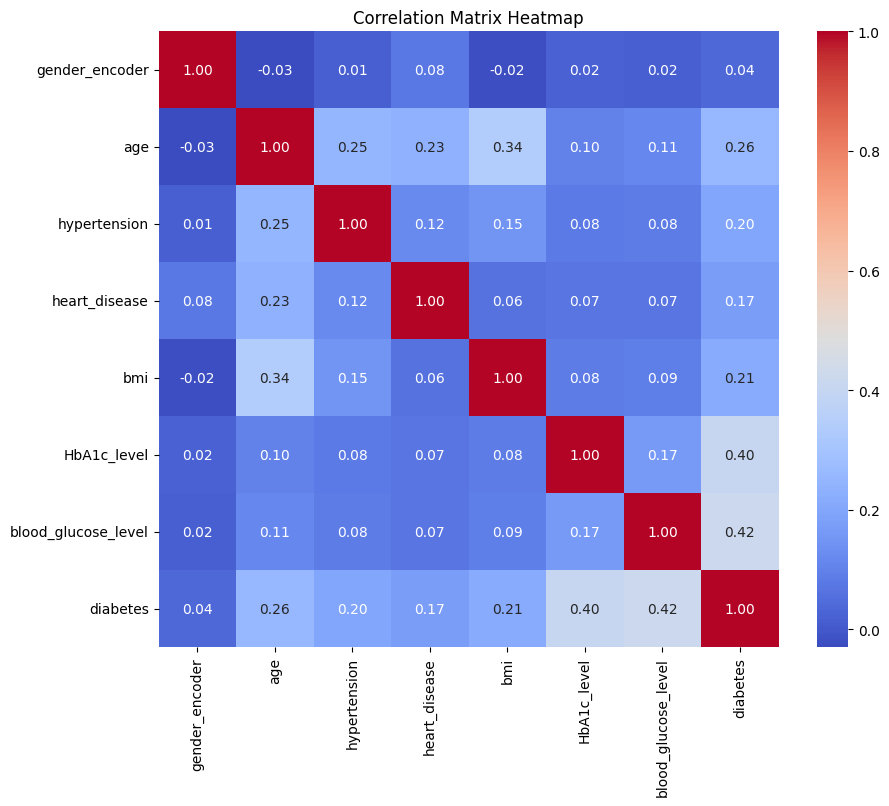

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

#COMMENTAIRE
D'apres la visualisation gender a une tres faible relation avec le diabete donc je peux soit l'enlever ou garder

In [ ]:
diabetes_counts = df['diabetes'].value_counts()
print(len(df[df['diabetes']==1]))
print(diabetes_counts.values)
#on est sur maintenant qu'il y a 8500 personnes diabetiques et 91482 non diabetiques

8500
[91482  8500]


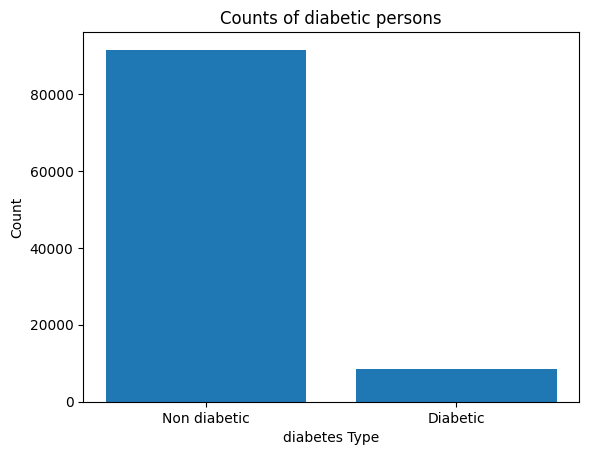

In [ ]:
diabetes_counts = df['diabetes'].value_counts()

# Create a bar plot
plt.bar(diabetes_counts.index, diabetes_counts.values)

# Customize the plot
plt.xlabel('diabetes Type')
plt.ylabel('Count')
plt.xticks(diabetes_counts.index, ['Non diabetic','Diabetic'])
plt.title('Counts of diabetic persons')

# Show the plot
plt.show()
#the output is unbalanced so we should handle with this unbalenced data

In [ ]:
from sklearn.model_selection import train_test_split
x,y=df[['gender_encoder', 'age', 'hypertension', 'heart_disease', 'bmi',
                        'HbA1c_level', 'blood_glucose_level']],df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
#Standarisation de x_train et x_test
from sklearn.preprocessing import MinMaxScaler
scaler_train = MinMaxScaler()
x_train_scaled = scaler_train.fit_transform(X_train)
scaler_test = MinMaxScaler()
x_test_scaled = scaler_train.fit_transform(X_test)

In [ ]:
import numpy as np
unique,count=np.unique(y_train,return_counts=True)
y_train_dict={k:v for (k,v) in zip(unique,count)}
y_train_dict

{0: 73260, 1: 6725}

In [ ]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(sampling_strategy='auto', random_state=42)
x_train_res,y_train_res = sm.fit_resample(x_train_scaled,y_train)

In [ ]:
unique,count=np.unique(y_train_res,return_counts=True)
y_train_smote_dict={k:v for (k,v) in zip(unique,count)}
y_train_smote_dict

{0: 73260, 1: 73260}

#Testing Using Logistic Regression

**training and testing with SMOTE technique**

In [ ]:
from sklearn.linear_model import LogisticRegression
# Create a logistic regression model
model1 = LogisticRegression(max_iter=1000)
# Train the model on the training data
model1.fit(x_train_res, y_train_res)

LogisticRegression(max_iter=1000)

In [ ]:
#test
y_pred = model1.predict(x_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", matrix)

Accuracy: 0.8874831224683702
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.89      0.93     18222
           1       0.43      0.89      0.58      1775

    accuracy                           0.89     19997
   macro avg       0.71      0.89      0.76     19997
weighted avg       0.94      0.89      0.90     19997

Confusion Matrix:
 [[16172  2050]
 [  200  1575]]


**training and testing without SMOTE technique**

In [ ]:
# Create a logistic regression model
model2 = LogisticRegression(max_iter=1000)
# Train the model on the training data
model2.fit(x_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
#test
y_pred_non_smote = model2.predict(x_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred_non_smote)
report = classification_report(y_test,y_pred_non_smote)
matrix = confusion_matrix(y_test, y_pred_non_smote)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", matrix)

Accuracy: 0.959693954093114
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     18222
           1       0.89      0.63      0.73      1775

    accuracy                           0.96     19997
   macro avg       0.93      0.81      0.86     19997
weighted avg       0.96      0.96      0.96     19997

Confusion Matrix:
 [[18080   142]
 [  664  1111]]


#COMMENTAIRE
d'apres la matrice de confusion des deux modeles le nombres de 'false positive' et trop grand pour le model sans SMOTE par rapport au celle effectue par SMOTE (664>>200) \\
----> SMOTE permet de mieux detecter la class minoritaire (personnes diabètiques) \\
----> pour le model simple accuracy=0.959 trop eleve (Risque d'un Overfitting)

**Optimisation avec GridSearch**

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 3, 10, 100],  # Différentes valeurs de C
    'penalty': ['l1', 'l2'],  # Différents types de régularisation
    'max_iter': range(1000, 10000, 1000),  # Plage de valeurs pour max_iter
    'solver': ['saga', 'liblinear']  # Différents solveurs
}
model_optimized= LogisticRegression()
grid_search = GridSearchCV(model_optimized, param_grid, cv=5)
grid_search.fit(x_train_res, y_train_res)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [ ]:
print("Meilleurs paramètres:", best_params)
print("Meilleur modèle:", best_model)

Meilleurs paramètres: {'C': 0.1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}
Meilleur modèle: LogisticRegression(C=0.1, max_iter=1000, solver='liblinear')


In [ ]:
y_pred_opt = best_model.predict(x_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred_opt)
report = classification_report(y_test,y_pred_opt)
matrix = confusion_matrix(y_test, y_pred_opt)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", matrix)

Accuracy: 0.8878331749762465
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.89      0.94     18222
           1       0.44      0.89      0.58      1775

    accuracy                           0.89     19997
   macro avg       0.71      0.89      0.76     19997
weighted avg       0.94      0.89      0.90     19997

Confusion Matrix:
 [[16183  2039]
 [  204  1571]]


**Model Simple Optimisé avec GridSearch**

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 3, 10, 100],  # Différentes valeurs de C
    'penalty': ['l1', 'l2'],  # Différents types de régularisation
    'max_iter': range(1000, 10000, 1000),  # Plage de valeurs pour max_iter
    'solver': ['saga', 'liblinear']  # Différents solveurs
}
model_optimized1= LogisticRegression()
grid_search = GridSearchCV(model_optimized1, param_grid, cv=5)
grid_search.fit(x_train_scaled, y_train)
best_params1 = grid_search.best_params_
best_model1 = grid_search.best_estimator_

In [ ]:
print("Meilleurs paramètres:", best_params1)
print("Meilleur modèle:", best_model1)

Meilleurs paramètres: {'C': 0.1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
Meilleur modèle: LogisticRegression(C=0.1, max_iter=1000, penalty='l1', solver='liblinear')


In [ ]:
y_pred_opt1 = best_model1.predict(x_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred_opt)
report = classification_report(y_test,y_pred_opt)
matrix = confusion_matrix(y_test, y_pred_opt)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", matrix)

Accuracy: 0.8878331749762465
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.89      0.94     18222
           1       0.44      0.89      0.58      1775

    accuracy                           0.89     19997
   macro avg       0.71      0.89      0.76     19997
weighted avg       0.94      0.89      0.90     19997

Confusion Matrix:
 [[16183  2039]
 [  204  1571]]


# test with balanced data using KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, scoring='accuracy', cv=5)
grid_search.fit(x_train_res, y_train_res)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Meilleurs paramètres :", best_params)
print("Meilleur score (précision) :", best_score)

Meilleurs paramètres : {'n_neighbors': 3, 'weights': 'distance'}
Meilleur score (précision) : 0.9596983346983347


In [ ]:
best_knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], weights=best_params['weights'])
best_knn.fit(x_train_res, y_train_res)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred_opt)
report = classification_report(y_test,y_pred_opt)
matrix = confusion_matrix(y_test, y_pred_opt)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", matrix)

Accuracy: 0.8878331749762465
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.89      0.94     18222
           1       0.44      0.89      0.58      1775

    accuracy                           0.89     19997
   macro avg       0.71      0.89      0.76     19997
weighted avg       0.94      0.89      0.90     19997

Confusion Matrix:
 [[16183  2039]
 [  204  1571]]


In [ ]:
y_pred_knn = best_model1.predict(x_test_scaled)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_knn)
report = classification_report(y_test,y_pred_knn)
matrix = confusion_matrix(y_test, y_pred_knn)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", matrix)

Accuracy: 0.9597939690953643
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     18222
           1       0.89      0.62      0.73      1775

    accuracy                           0.96     19997
   macro avg       0.93      0.81      0.86     19997
weighted avg       0.96      0.96      0.96     19997

Confusion Matrix:
 [[18087   135]
 [  669  1106]]


#test with balanced data using SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
}
svm = SVC()
grid_search_svm = GridSearchCV(svm, param_grid_svm, scoring='accuracy', cv=5)
grid_search_svm.fit(x_train_res, y_train_res)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [ ]:
best_params_svm = grid_search_svm.best_params_
print(best_params_svm)


{'C': 10, 'kernel': 'rbf'}


In [ ]:
best_svm = SVC(C=best_params_svm['C'], kernel=best_params_svm['kernel'])
best_svm.fit(x_train_res, y_train_res)

SVC(C=10)

In [ ]:
y_pred_svm = best_svm.predict(x_test_scaled)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_svm)
report = classification_report(y_test,y_pred_svm)
matrix = confusion_matrix(y_test, y_pred_svm)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", matrix)

Accuracy: 0.8858828824323649
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.88      0.93     18222
           1       0.43      0.93      0.59      1775

    accuracy                           0.89     19997
   macro avg       0.71      0.90      0.76     19997
weighted avg       0.94      0.89      0.90     19997

Confusion Matrix:
 [[16072  2150]
 [  132  1643]]


#Testing with Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
clf = DecisionTreeClassifier()
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(clf, param_grid_dt, cv=5, scoring='accuracy')
grid_search.fit(x_train_res, y_train_res)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(best_params)

{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
best_decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_leaf=1, min_samples_split=2)
# Entraînez le modèle sur l'ensemble d'entraînement
best_decision_tree.fit(x_train_res, y_train_res)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_pred_dt = best_decision_tree.predict(x_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred_dt)
report = classification_report(y_test,y_pred_dt)
matrix = confusion_matrix(y_test, y_pred_dt)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", matrix)

Accuracy: 0.9289893484022603
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96     18222
           1       0.57      0.77      0.66      1775

    accuracy                           0.93     19997
   macro avg       0.78      0.86      0.81     19997
weighted avg       0.94      0.93      0.93     19997

Confusion Matrix:
 [[17206  1016]
 [  404  1371]]


#conclusion SVM est le plus perfermant car il les faux negative le plus faible

#Testing using Random Forest

Last session

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create a Random Forest classifier
rf_clf = RandomForestClassifier()

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search with Random Forest
grid_search_rf = GridSearchCV(rf_clf, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(x_train_res, y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
# Get the best parameters and the best estimator
best_params_rf = grid_search_rf.best_params_
best_estimator_rf = grid_search_rf.best_estimator_
print(best_params_rf)

{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
# Create a Random Forest classifier with the best parameters
best_rf_model = RandomForestClassifier(
    criterion='entropy',
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200
)

# Fit the model to the data
best_rf_model.fit(x_train_res, y_train_res)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [ ]:
y_pred_rf = best_rf_model.predict(x_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred_rf)
report = classification_report(y_test,y_pred_rf)
matrix = confusion_matrix(y_test, y_pred_rf)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", matrix)

Accuracy: 0.9455418312746912
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97     18222
           1       0.67      0.77      0.72      1775

    accuracy                           0.95     19997
   macro avg       0.82      0.87      0.84     19997
weighted avg       0.95      0.95      0.95     19997

Confusion Matrix:
 [[17538   684]
 [  405  1370]]


#Final Conclusion : SVM still the best model